# Perkenalan

Nama: Farissthira Sahasrabhanu

Batch: HCK-032

Program ini adalah untuk mengembangkan model prediksi harga tiket pesawat berdasarkan fitur-fitur yang relevan, agar maskapai atau platform pemesanan dapat menetapkan harga yang kompetitif dan menguntungkan.

## Background

Maskapai penerbangan adalah perusahaan yang menyediakan layanan transportasi udara untuk penumpang dan kargo. Maskapai menggunakan pesawat untuk memberikan layanan tersebut dan dapat membentuk kemitraan atau aliansi dengan maskapai lain melalui perjanjian codeshare, di mana keduanya menawarkan dan mengoperasikan penerbangan yang sama. Umumnya, perusahaan maskapai penerbangan diakui melalui sertifikat operasi udara atau lisensi yang diterbitkan oleh badan penerbangan pemerintah. Maskapai bisa beroperasi secara terjadwal atau charter.

Maskapai menetapkan harga untuk layanan mereka dengan tujuan memaksimalkan keuntungan. Penentuan harga tiket pesawat semakin rumit dari waktu ke waktu dan kini sebagian besar ditentukan oleh sistem manajemen pendapatan berbasis komputer.

Harga tiket pesawat dipengaruhi oleh berbagai faktor, seperti durasi penerbangan, jumlah hari sebelum keberangkatan, waktu tiba, dan waktu berangkat, serta faktor lainnya. Maskapai dapat menurunkan harga tiket ketika ingin meningkatkan permintaan pasar, dan sebaliknya menaikkan harga ketika ketersediaan tiket semakin sedikit. Harga juga dapat bergantung pada berbagai faktor lain, di mana masing-masing faktor memiliki aturan dan algoritma tertentu dalam penetapan harga. Machine Learning (ML) memungkinkan kita untuk mengidentifikasi aturan-aturan tersebut dan memodelkan variasi harga secara lebih akurat.

## SMART

Tujuan proyek ini adalah membantu maskapai penerbangan menetapkan harga tiket secara lebih optimal dengan membangun model prediksi berbasis machine learning. Secara spesifik, model ini digunakan untuk memperkirakan harga tiket berdasarkan faktor seperti maskapai, rute, dan waktu keberangkatan sehingga bisa mendukung strategi penetapan harga dinamis (dynamic pricing). Target yang terukur adalah meningkatkan akurasi prediksi harga sehingga memungkinkan maskapai memperoleh peningkatan pendapatan hingga 10% dari penjualan tiket dalam periode promosi tertentu. Tujuan ini dapat dicapai karena memanfaatkan data historis penerbangan yang sudah tersedia dan teknik machine learning yang terbukti efektif dalam prediksi harga. Proyek ini sangat relevan bagi bisnis karena persaingan ketat di industri penerbangan menuntut efisiensi dalam strategi harga untuk menjaga profitabilitas sekaligus meningkatkan kepuasan pelanggan. Seluruh capaian ditargetkan selesai dalam jangka waktu 3 bulan, sehingga maskapai dapat segera mengintegrasikannya ke dalam sistem penjualan.

## Problem Exploration

1) Bagaimana distribusi harga tiket penerbangan secara umum?
2) Apakah ada perbedaan harga rata-rata antar maskapai (Airline)?
3) Apakah waktu keberangkatan memengaruhi harga tiket?
4) Bagaimana pengaruh durasi penerbangan terhadap harga tiket?
5) Apakah jumlah pemberhentian memengaruhi harga tiket?
6) Kota mana yang paling sering menjadi tujuan penerbangan?
7) Bagaimana perbandingan jumlah penerbangan tiap maskapai?

## Dataset 

https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data 

Dataset yang digunakan adalah Flight Price Prediction dari Kaggle, dataset ini sekitar 300.261 baris data pemesanan penerbangan. 

Data awalnya di-scrape dari situs “Ease My Trip” (platform pemesanan tiket penerbangan di India) dalam kurun waktu sekitar 50 hari (dari 11 Februari sampai 31 Maret 2022). 

Dataset ini terdiri dari sekitar 12 kolom fitur (termasuk fitur target yaitu harga tiket).

The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from scipy.stats import spearmanr, f_oneway


import pickle
import json
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Insight:

- Dataset ini berisi 12 kolom dengan 300153 baris

- Terdapat kolom unnamed yang berisikan serial penerbangan (Bukan Flight Number) yang berarti fitur pada dataset ini ada 11.

- Tipe Data sudah terlihat benar semua.

- Terdapat 8 Fitur kategorikal dan 3 fitur numerik


In [4]:
df.duplicated().sum()

0

Tidak ada data duplicate pada dataset

In [5]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Tidak ada missing value pada Dataset

# Exploratory Data Analysis

## 1. Bagaimana distribusi harga tiket penerbangan secara umum?

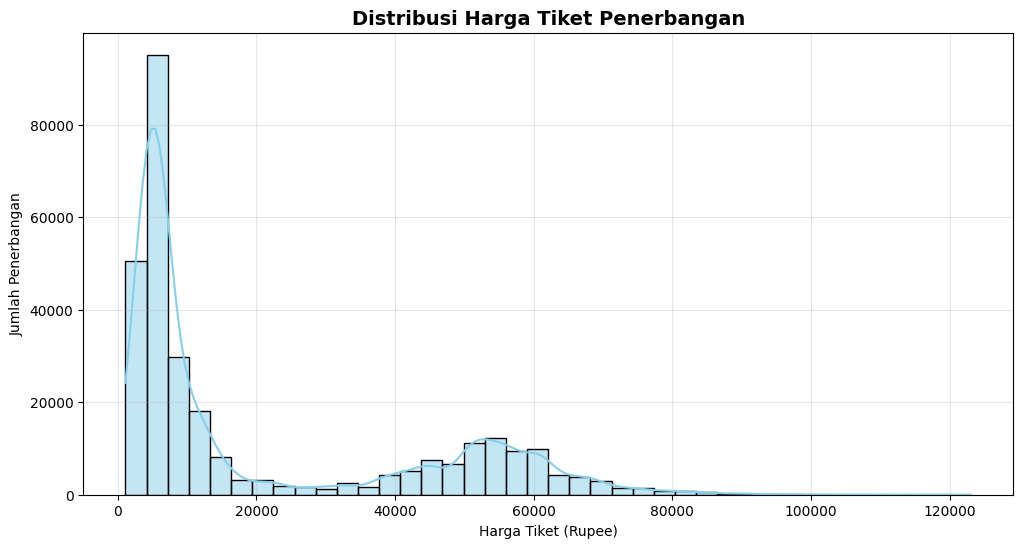

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [6]:
# Histogram distribusi harga tiket
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=40, kde=True, color='skyblue')
plt.title("Distribusi Harga Tiket Penerbangan", fontsize=14, weight='bold')
plt.xlabel("Harga Tiket (Rupee)")
plt.ylabel("Jumlah Penerbangan")
plt.grid(alpha=0.3)
plt.show()

df['price'].describe()

Insight:

- Distribusi tidak normal (Right-skewed)
- Terlihat jelas dari histogram bahwa mayoritas harga tiket berada di kisaran 4000 – 10000 Rupee, sementara masih ada sebagian kecil tiket dengan harga jauh lebih mahal (hingga 120000 Rupee)
- Mean jauh diatas median, berarti membuktikan bahwa data ini skewed secara positif, hal ini terjadi karena ada outlier ekstrim yang menarik mean.
- std juga tinggi berarti data sangat rentang dan menyebar.

## 2. Apakah ada perbedaan harga rata-rata antar maskapai (Airline)?

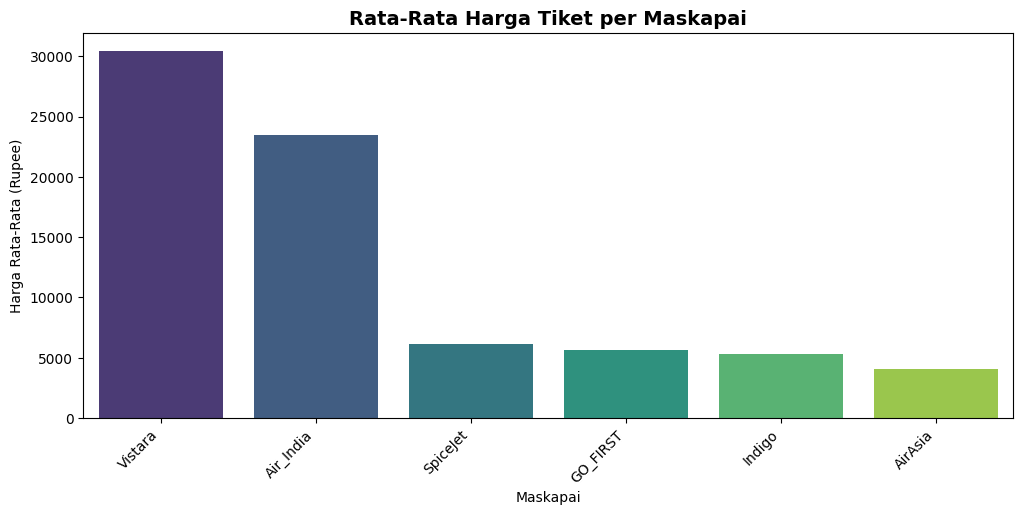

In [7]:
# Urutkan maskapai berdasarkan harga rata-rata biar plot-nya rapi
avg_price = df.groupby('airline')['price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,5))
sns.barplot(
    x='airline', 
    y='price', 
    data=avg_price, 
    palette='viridis'
)
plt.title("Rata-Rata Harga Tiket per Maskapai", fontsize=14, weight='bold')
plt.xlabel("Maskapai")
plt.ylabel("Harga Rata-Rata (Rupee)")
plt.xticks(rotation=45, ha='right')
plt.show()

Insight:

- Vistara dan Air India mendominasi harga tinggi, kemungkinan maskapai ini adalah maskapai kelas atas/luxury (Rata-rata diatas 20000 Rupee)
- Maskapai seperti SpiceJet, GO_FIRST, IndiGo, dan AirAsia memiliki rata-rata harga di bawah 10000 Rupee. Mungkin budget airline.

## 3. Apakah waktu keberangkatan memengaruhi harga tiket?

In [8]:
# Cek nilai unik Departure_Time
print(df['departure_time'].unique())


['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


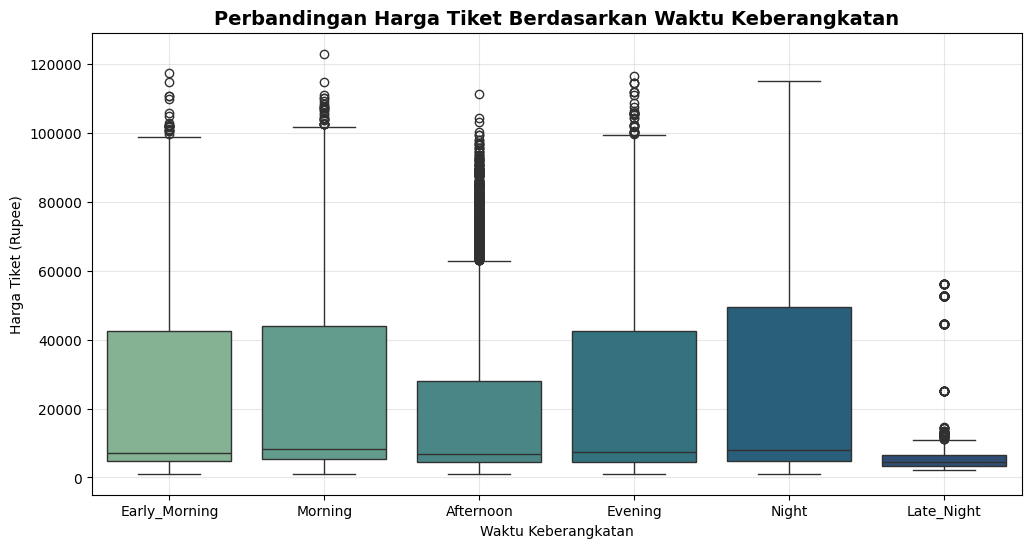

In [9]:
# Urutkan kategori waktu biar visual rapih
order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']

plt.figure(figsize=(12,6))
sns.boxplot(
    x='departure_time',
    y='price',
    data=df,
    order=order,
    palette='crest'
)
plt.title("Perbandingan Harga Tiket Berdasarkan Waktu Keberangkatan", fontsize=14, weight='bold')
plt.xlabel("Waktu Keberangkatan")
plt.ylabel("Harga Tiket (Rupee)")
plt.grid(alpha=0.3)
plt.show()

Insight:

- Harga tertinggi cenderung muncul pada kategori "Early Morning", "Morning", "Evening", dan "Night". Hal ini masuk akal karena waktu tersebut merupakan jam sibuk penerbangan.
- "Afternoon" dan "Late Night" memiliki rata-rata yang lebih rendah dari yang lain.
- Kecuali "Late Night", median terlihat cukup berdekatan.

## 4. Apakah harga tiket dipengaruhi oleh durasi penerbangan?

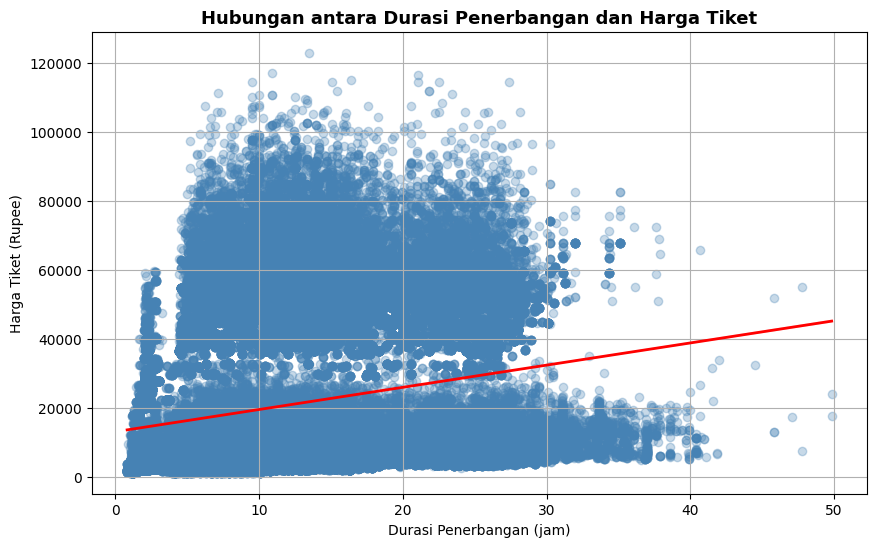

Korelasi antara Durasi dan Harga Tiket: 0.32


In [10]:
plt.figure(figsize=(10,6))
sns.regplot(
    x='duration',
    y='price',
    data=df,
    scatter_kws={'alpha':0.3, 'color':'steelblue'},
    line_kws={'color':'red', 'lw':2}
)
plt.title('Hubungan antara Durasi Penerbangan dan Harga Tiket', fontsize=13, fontweight='bold')
plt.xlabel('Durasi Penerbangan (jam)')
plt.ylabel('Harga Tiket (Rupee)')
plt.grid(True)
plt.show()
corr = df['duration'].corr(df['price'], method='spearman')
print(f'Korelasi antara Durasi dan Harga Tiket: {corr:.2f}')

Insight:

- Ada korelasi positif antara durasi penerbangan dan harga tiket, artinya semakin lama durasinya, harga tiket meningkat.
- Tapi sebarannya masih cukup lebar, artinya hubungan ini tidak terlalu kuat.
- Nilai Korelasi Spearman (karena data skewed) juga 0.32 yang dapat digolongkan "lemah", jadi ada hubungan namun banyak faktor lain yang mungkin lebih berpengaruh.

## 5. Apakah jumlah pemberhentian memengaruhi harga tiket?

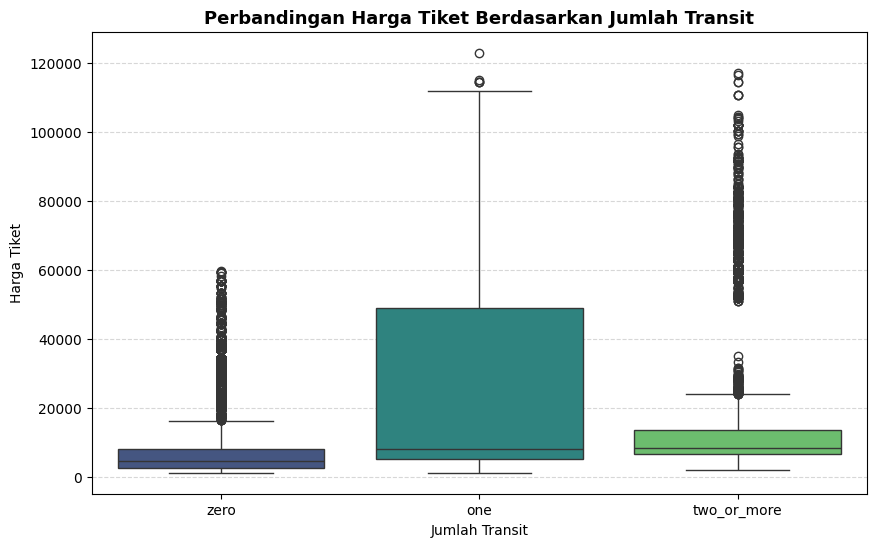

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='stops', y='price', data=df, palette='viridis')

plt.title('Perbandingan Harga Tiket Berdasarkan Jumlah Transit', fontsize=13, fontweight='bold')
plt.xlabel('Jumlah Transit')
plt.ylabel('Harga Tiket')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Insight:

- Penerbangan tanpa transit (zero) punya harga paling rendah dan stabil, mayoritas di bawah 15000 Rupee.
- Penerbangan dengan satu transit (one) menunjukkan rentang harga paling lebar, bahkan ada yang tembus di atas 100000 Rupee, kemungkinan karena rute panjang atau maskapai premium.
- Kategori two_or_more justru punya harga sedikit lebih tinggi dari zero, tapi lebih murah rata-ratanya dibanding one mungkin karena rute ini lebih panjang tapi dioperasikan oleh maskapai low-cost.

## 6. Kota mana yang paling sering menjadi tujuan penerbangan?

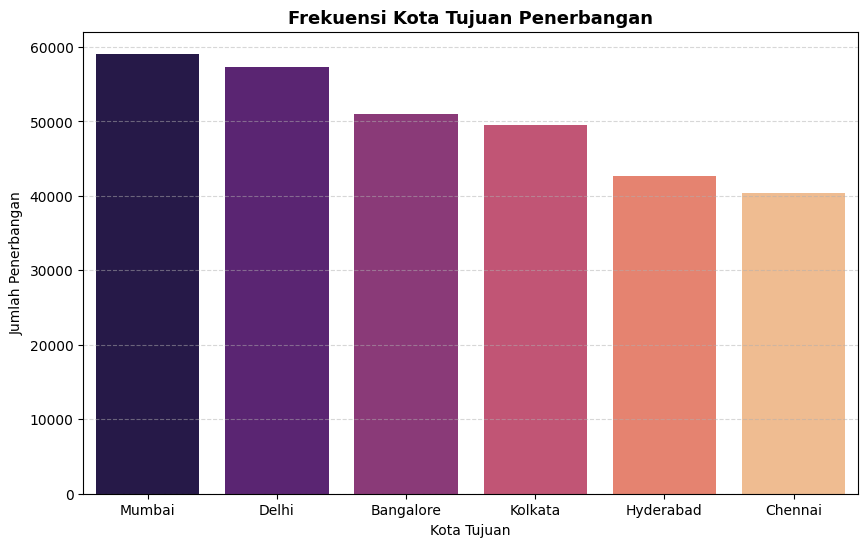

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='destination_city', 
    data=df, 
    order=df['destination_city'].value_counts().index, 
    palette='magma'
)

plt.title('Frekuensi Kota Tujuan Penerbangan', fontsize=13, fontweight='bold')
plt.xlabel('Kota Tujuan')
plt.ylabel('Jumlah Penerbangan')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Insight:

- Kota tujuan yang paling sering muncul adalah Mumbai, diikuti oleh Delhi dan Bangalore. Kemungkinan kota ini adalah kota besar dengan bandara tersibuk di India.

## 7. Bagaimana perbandingan jumlah penerbangan tiap maskapai?

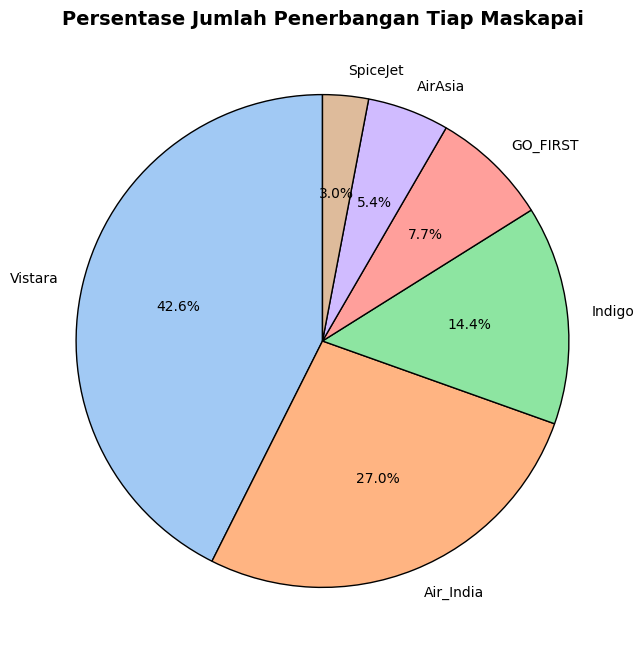

In [13]:
# Hitung jumlah penerbangan per maskapai
airline_counts = df['airline'].value_counts()

# Buat pie chart
plt.figure(figsize=(8,8))
plt.pie(
    airline_counts,
    labels=airline_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Persentase Jumlah Penerbangan Tiap Maskapai', fontsize=14, fontweight='bold')
plt.show()

Insight:

- Vistara mendominasi jumlah penerbangan (lebih dari 40% dari total).
- Air India juga punya porsi besar (27%).
- Maskapai seperti Indigo, GO_FIRST, AirAsia, dan SpiceJet punya kontribusi lebih kecil.

Jadi, secara keseluruhan, dua maskapai besar (Vistara dan Air India) menguasai hampir 70% total penerbangan

# Feature Engineering

Dalam pembuatan model ini, mengingat kita memiliki baris data sebanyak sekitar 300000, kita akan membuat model menggunakan subset 1% dari data (Sekitar 3000 baris)

In [14]:
subset_df = df.sample(frac=0.01, random_state=42)

## Handling Cardinality

In [15]:
def cardinality_check(data, list_cols):
    """
    Fungsi untuk mengecek kardinalitas (jumlah nilai unique) dari kolom-kolom tertentu
    
    Parameters:
    
    data : pd.DataFrame
        DataFrame yang akan dicek
    list_cols : list
        List nama kolom yang akan dicek kardinalitasnya
    
    Returns:
    
    pd.DataFrame
        DataFrame berisi informasi kardinalitas setiap kolom
    """
    
    results = []
    
    for col in list_cols:
        # Hitung jumlah unique values
        n_unique = data[col].nunique()
        unique_values = data[col].unique()
        
        # Format tampilan unique values - tampilkan semua
        unique_display = list(unique_values)
        
        results.append({
            'Nama Kolom': col,
            'Jumlah Unique': n_unique,
            'Nilai Unique': unique_display
        })
    
    result_df = pd.DataFrame(results)
    return result_df

pd.set_option('display.max_colwidth', None)
cardinality_check(subset_df, subset_df.columns)

,Nama Kolom,Jumlah Unique,Nilai Unique
0,Unnamed: 0,3002,"[27131, 266857, 141228, 288329, 97334, 135931, 290630, 141944, 244517, 215903, 282552, 254237, 183617, 79761, 213925, 233936, 98502, 96776, 228194, 27896, 100832, 242790, 151132, 270236, 208084, 7707, 284144, 142308, 402, 110445, 216833, 216694, 10932, 29970, 154647, 77065, 265580, 171855, 284403, 75131, 14176, 87277, 29163, 66864, 227316, 95370, 172823, 185140, 71716, 137722, 246352, 18110, 172088, 188544, 151614, 127692, 11751, 166800, 198586, 279839, 105830, 181043, 70952, 37906, 21039, 244496, 280111, 142590, 271709, 75853, 165919, 83482, 211622, 241932, 95307, 60605, 19809, 199463, 81536, 1708, 83578, 21615, 191048, 153691, 268308, 282175, 295417, 248651, 32923, 208632, 295306, 253583, 268650, 21031, 203616, 48518, 40489, 190565, 137474, 126939, ...]"
1,airline,6,"[Air_India, Vistara, AirAsia, Indigo, SpiceJet, GO_FIRST]"
2,flight,762,"[AI-506, UK-706, UK-772, UK-824, AI-501, I5-510, UK-826, 6E-271, AI-619, UK-953, UK-876, AI-808, I5-517, SG-488, UK-819, AI-607, UK-818, I5-741, AI-888, UK-811, UK-897, AI-635, AI-424, AI-887, G8-346, UK-870, SG-1063, 6E-6326, UK-927, AI-803, 6E-772, AI-839, G8-515, AI-671, I5-1543, UK-860, UK-877, UK-977, 6E-7223, UK-951, SG-8710, I5-974, UK-845, I5-830, AI-640, AI-441, G8-123, AI-538, AI-770, UK-738, 6E-6205, 6E-531, I5-557, AI-840, I5-2461, UK-828, 6E-711, G8-7535, 6E-7403, UK-930, AI-676, 6E-5202, AI-9921, UK-944, UK-815, UK-986, SG-401, AI-660, 6E-236, G8-237, UK-823, AI-762, AI-9894, AI-541, 6E-2618, UK-993, UK-802, UK-778, 6E-2083, AI-440, AI-673, G8-336, UK-836, 6E-6488, UK-776, UK-825, UK-954, I5-1529, AI-804, AI-868, SG-8938, AI-479, I5-2472, UK-864, I5-423, 6E-2336, 6E-426, SG-455, SG-520, AI-401, ...]"
3,source_city,6,"[Delhi, Kolkata, Chennai, Bangalore, Mumbai, Hyderabad]"
4,departure_time,6,"[Morning, Night, Afternoon, Early_Morning, Evening, Late_Night]"
5,stops,3,"[one, zero, two_or_more]"
6,arrival_time,6,"[Early_Morning, Night, Morning, Afternoon, Evening, Late_Night]"
7,destination_city,6,"[Kolkata, Mumbai, Bangalore, Delhi, Chennai, Hyderabad]"
8,class,2,"[Economy, Business]"
9,duration,347,"[19.75, 9.83, 10.5, 14.5, 8.25, 10.83, 2.0, 7.75, 26.33, 20.17, 21.67, 17.5, 13.5, 6.83, 2.75, 1.75, 14.08, 10.92, 2.25, 14.0, 15.08, 16.5, 29.5, 8.58, 2.08, 26.17, 9.0, 2.33, 9.58, 10.42, 23.08, 2.92, 2.17, 13.0, 24.92, 11.75, 6.75, 26.75, 1.5, 12.83, 5.17, 11.33, 16.17, 15.83, 5.58, 14.92, 12.75, 13.67, 24.67, 1.83, 23.67, 22.5, 16.42, 5.83, 9.08, 2.42, 12.25, 10.0, 8.5, 14.67, 5.75, 8.83, 22.67, 26.25, 3.42, 17.0, 8.08, 12.67, 11.17, 1.33, 18.5, 31.08, 6.58, 9.25, 12.42, 22.25, 20.33, 7.58, 13.75, 17.33, 5.5, 13.17, 8.0, 11.25, 7.5, 14.42, 2.83, 8.33, 17.83, 2.5, 16.92, 30.33, 5.92, 18.33, 23.58, 12.33, 12.92, 16.33, 6.33, 19.92, ...]"


Insight:

- Masih ada kolom Unnamed :0 yang merupakan index/serial dari dataset ini, akan kita drop.
- Kolom flight adalah Flight Number yang mengidentifikasi penerbangan, karena ini adalah data identifier maka juga bisa kita drop.
- Selain Unnamed :0, flight, kolom lainnya aman.

## Train-Test Split

In [16]:
# Fitur & target
X = subset_df.drop(columns=['flight', 'Unnamed: 0', 'price'])
y = subset_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")
X_train.head()

Train size: (2401, 9)
Test size: (601, 9)


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
279641,Air_India,Hyderabad,Morning,one,Night,Mumbai,Business,10.83,39
182976,Vistara,Chennai,Night,zero,Night,Delhi,Economy,2.83,21
90623,Indigo,Bangalore,Morning,one,Afternoon,Delhi,Economy,6.67,33
132563,GO_FIRST,Kolkata,Early_Morning,one,Afternoon,Mumbai,Economy,9.58,32
296757,Air_India,Chennai,Early_Morning,one,Night,Kolkata,Business,16.17,20


Kita memiliki 2401 baris train, dan 601 baris test.

## Handling Missing Value

In [17]:
X_train.isna().sum().sort_values(ascending=False)

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

Tidak ada missing value.

## Handling Outlier

Karena kita sudah mengetahui dari EDA bahwa distribusi data ini tidak normal, sehingga kita akan deteksi outlier menggunakan Tukey's Rule (IQR)

In [18]:
x_train_num_cols = X_train.select_dtypes(include=['int64', 'float64'])
outlier_summary = {}

for col in x_train_num_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Hitung jumlah outlier
    outliers = X_train[(X_train[col] < lower_bound) | (X_train[col] > upper_bound)][col]
    outlier_pct = len(outliers) / len(X) * 100
    
    outlier_summary[col] = {
        "Jumlah Outlier": len(outliers),
        "Persentase Outlier (%)": round(outlier_pct, 2),
        "Min": X_train[col].min(),
        "Max": X_train[col].max()
    }

for col, stats in outlier_summary.items():
    print(
        f"{col:<15} | "
        f"Jumlah Outlier: {stats['Jumlah Outlier']:<5} | "
        f"Persentase: {stats['Persentase Outlier (%)']:<6}% | "
        f"Min: {stats['Min']:<10} | "
        f"Max: {stats['Max']:<10}"
    )

duration        | Jumlah Outlier: 12    | Persentase: 0.4   % | Min: 1.0        | Max: 35.42     
days_left       | Jumlah Outlier: 0     | Persentase: 0.0   % | Min: 1          | Max: 49        


Disini kita melihat kita memiliki outlier yang sangat minim, namun disini terdapat value maksimal dari duration yaitu 35 jam, hal ini mungkin masih wajar karena mengingat di data kita ada beberapa penerbangan yang memiliki transit 2 atau lebih.

## Feature Selection

In [19]:
X_train.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
279641,Air_India,Hyderabad,Morning,one,Night,Mumbai,Business,10.83,39
182976,Vistara,Chennai,Night,zero,Night,Delhi,Economy,2.83,21
90623,Indigo,Bangalore,Morning,one,Afternoon,Delhi,Economy,6.67,33
132563,GO_FIRST,Kolkata,Early_Morning,one,Afternoon,Mumbai,Economy,9.58,32
296757,Air_India,Chennai,Early_Morning,one,Night,Kolkata,Business,16.17,20


Kita akan mengelompokan kolom kedalam kolom numerik dan kategorikal

In [20]:
numeric_cols = X_train.select_dtypes(include=np.number).columns
categorical_cols = X_train.select_dtypes(exclude=np.number).columns

print("Kolom numerik:", numeric_cols.tolist())
print("Kolom kategorikal:", categorical_cols.tolist())

Kolom numerik: ['duration', 'days_left']
Kolom kategorikal: ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


Karena dari EDA kita sudah mengetahui persebaran data kita tidak normal, maka untuk numerik kita akan menggunakan metode spearman untuk mengecek korelasi, dan untuk kategorikal, kita akan menggunakan ANOVA (f_oneway)

### Feature Numeric

In [21]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in numeric_cols:
  corr_coef, p_value = spearmanr(X_train[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,duration,ada korelasi
1,days_left,ada korelasi


Disini kedua kolom numerik memiliki korelasi terhadap harga.

### Feature Categorical

In [22]:
p_values = []
interpretasi = []
cols = []

for col in categorical_cols:
    # Bagi y_train sesuai kategori
    groups = [y_train[X_train[col] == cat] for cat in X_train[col].unique()]
    
    # Skip kalau kategorinya cuma 1
    if len(groups) < 2:
        p_values.append(None)
        interpretasi.append('kategori kurang dari 2')
        cols.append(col)
        continue
    
    # ANOVA
    f_stat, p_value = f_oneway(*groups)
    p_values.append(p_value)
    cols.append(col)

    if p_value < 0.05:
        interpretasi.append('ada perbedaan signifikan rata-rata (ada pengaruh)')
    else:
        interpretasi.append('tidak signifikan')

hasil_anova = pd.DataFrame({
    'nama kolom': cols,
    'p-value': p_values,
    'hasil': interpretasi
})

print(hasil_anova)

         nama kolom        p-value  \
0           airline  5.300351e-127   
1       source_city   9.534090e-02   
2    departure_time   2.387627e-05   
3             stops   5.089674e-25   
4      arrival_time   1.291685e-05   
5  destination_city   1.795596e-03   
6             class   0.000000e+00   

                                               hasil  
0  ada perbedaan signifikan rata-rata (ada pengaruh)  
1                                   tidak signifikan  
2  ada perbedaan signifikan rata-rata (ada pengaruh)  
3  ada perbedaan signifikan rata-rata (ada pengaruh)  
4  ada perbedaan signifikan rata-rata (ada pengaruh)  
5  ada perbedaan signifikan rata-rata (ada pengaruh)  
6  ada perbedaan signifikan rata-rata (ada pengaruh)  


Disini semua kolom kategorikal juga memiliki korelasi terhadap target kecuali source city, maka akan kita drop. (Karena mungkin sudah ada departure city, source city sudah "terwakilkan" oleh duration penerbangan, stops, airline)

In [23]:
X_train = X_train.drop(columns='source_city')
X_test = X_test.drop(columns='source_city')

## Scaling dan Encoding (Pipeline)

In [24]:
X_train

,airline,departure_time,stops,arrival_time,destination_city,class,duration,days_left
279641,Air_India,Morning,one,Night,Mumbai,Business,10.83,39
182976,Vistara,Night,zero,Night,Delhi,Economy,2.83,21
90623,Indigo,Morning,one,Afternoon,Delhi,Economy,6.67,33
132563,GO_FIRST,Early_Morning,one,Afternoon,Mumbai,Economy,9.58,32
296757,Air_India,Early_Morning,one,Night,Kolkata,Business,16.17,20
...,...,...,...,...,...,...,...,...
175927,Air_India,Evening,one,Afternoon,Kolkata,Economy,22.25,46
129584,Vistara,Morning,one,Night,Mumbai,Economy,11.33,15
111223,Air_India,Evening,one,Evening,Hyderabad,Economy,25.50,15
169742,Vistara,Early_Morning,one,Evening,Bangalore,Economy,10.17,41


Disini kita akan menggunakan minmaxscaler untuk numerik karena dari EDA kita sudah tau bahwa persebarannya tidak normal, lalu untuk kategorikal kita akan menggunakan onehotencoder, disini kolom class karena hanya berisi Business dan Economy maka juga akan masuk ke onehot.

In [25]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
    ('numerical', Pipeline([
        ('scaler', MinMaxScaler())
    ]), selector(dtype_exclude='object')),
    ('categorical', Pipeline([
        ('encoder', OneHotEncoder())
    ]), selector(dtype_include='object'))
])

# Model Definition

kita akan menggunakan algoritma model KNN (KNeighborsRegressor), SVM (SVR), Decision Tree (DecisionTreeRegressor), Random Forest (RandomForestRegressor) dan Boosting (GradientBoostingRegressor) sebagai base model.

In [26]:
#Making pipeline for KNN
knn_reg = Pipeline([
('transformer', transformer),
('classifier', KNeighborsRegressor())
])

#Making pipeline for SVM 
SVM_reg = Pipeline([
('transformer', transformer),
('classifier', SVR())
])

#Making pipeline for Decision Tree
dt_reg = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeRegressor())
])

#Making pipeline for Random Forest
rf_reg = Pipeline([
('transformer', transformer),
('classifier', RandomForestRegressor())
])

#Making pipeline for XGBoost
gboost_reg = Pipeline([
('transformer', transformer),
('classifier', GradientBoostingRegressor())
])

# Model Training (Base Model)

## KNeighbors Regressor

In [27]:
knn_reg.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA25240700>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA2572FA60>)])),
                ('classifier', KNeighborsRegressor())])

## Support Vector Regression

In [28]:
SVM_reg.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA25240700>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA2572FA60>)])),
                ('classifier', SVR())])

## Decision Tree Regressor

In [29]:
dt_reg.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA25240700>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA2572FA60>)])),
                ('classifier', DecisionTreeRegressor())])

## Random Forest Regressor

In [30]:
rf_reg.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA25240700>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA2572FA60>)])),
                ('classifier', RandomForestRegressor())])

## Gradient Boost Regressor

In [31]:
gboost_reg.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA25240700>),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA2572FA60>)])),
                ('classifier', GradientBoostingRegressor())])

# Model Evaluation

Kita akan membuat function untuk mengevaluasi model menggunakan beberapa metric.

Beberapa yang harus kita pahami untuk mengevaluasi model, karena target kita adalah harga, dari EDA kita sudah mengetahui bahwa median harga tiket adalah berada pada 7400 dan mean nya sekitar 20000, jadi kita harus mengingat itu dalam mempertimbangkan evaluasi model.

In [32]:
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
    # Prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluasi
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)

    # Evaluasi Test
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Cross Validation
    cv_r2 = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    cv_mae = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
    cv_rmse = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error')

    print("=== Evaluasi Model ===")
    print(f"Train R²   : {r2_train:.4f}")
    print(f"Test  R²   : {r2_test:.4f}")
    print(f"Train RMSE : {rmse_train:,.0f}")
    print(f"Test  RMSE : {rmse_test:,.0f}")
    print(f"Train MAE  : {mae_train:,.0f}")
    print(f"Test  MAE  : {mae_test:,.0f}")

    print("\n=== Cross Validation (cv=%d) ===" % cv)
    print(f"R²   : {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")
    print(f"MAE  : {-cv_mae.mean():,.0f} ± {cv_mae.std():,.2f}")
    print(f"RMSE : {-cv_rmse.mean():,.0f} ± {cv_rmse.std():,.2f}")



## KNeighbors Regressor

In [33]:
evaluate_model(knn_reg, X_train, y_train, X_test, y_test, cv=5)

=== Evaluasi Model ===
Train R²   : 0.9402
Test  R²   : 0.9116
Train RMSE : 5,563
Test  RMSE : 6,788
Train MAE  : 3,447
Test  MAE  : 4,285

=== Cross Validation (cv=5) ===
R²   : 0.9014 ± 0.0086
MAE  : 4,508 ± 239.35
RMSE : 7,138 ± 295.46


Insight:

- R2 score terlihat bagus, 94% pada train dan 91% pada test, berarti model cukup dapat menangkap pola harga.
- Pada RMSE terlihat sekitar 5500 pada train dan sekitar 6730 pada test, mengingat dari harga tiket biasanya 7500 - 20000 (median dan mean), hal ini merupakan error yang lumayan.
- MAE juga terlihat sekitar 3400 pada train dan sekitar 4200 pada test berarti ini juga error lumayan.
- Nilai CV juga mendukung poin-poin sebelumnya.

Berdasarkan hasil evaluasi bisa disimpulkan model ini *Underfit*

## Support Vector Regression

In [34]:
evaluate_model(SVM_reg, X_train, y_train, X_test, y_test, cv=5)

=== Evaluasi Model ===
Train R²   : -0.3433
Test  R²   : -0.3607
Train RMSE : 26,376
Test  RMSE : 26,632
Train MAE  : 15,918
Test  MAE  : 16,348

=== Cross Validation (cv=5) ===
R²   : -0.3444 ± 0.0142
MAE  : 15,931 ± 278.00
RMSE : 26,384 ± 254.26


Insight: 

- Bisa diliat dari seluruh metrik evaluasi model ini berpengaruh sangat buruk, dari R2 score minus berarti model lebih buruk daripada model yang hanya menebak
- Nilai MAE RMSE pada train dan test juga sangat besar
- Nilai cross validation juga mencerminkan error besar

Bisa disimpulkan model ini *Underfit* parah

## Decision Tree Regressor

In [35]:
evaluate_model(dt_reg, X_train, y_train, X_test, y_test, cv=5)

=== Evaluasi Model ===
Train R²   : 1.0000
Test  R²   : 0.9159
Train RMSE : 0
Test  RMSE : 6,621
Train MAE  : 0
Test  MAE  : 3,594

=== Cross Validation (cv=5) ===
R²   : 0.8948 ± 0.0088
MAE  : 4,019 ± 141.19
RMSE : 7,233 ± 275.33


Insight:

- Dari semua nilai pada train-set sempurna, ini sudah menjadi indikasi overfitting. Berarti model hanya menghapal data train.
- Dari crossvalidation nilainya stabil, mungkin fit modelnya terlalu sempurna ke train set
- Dari di test set errornya lumayan.

Jadi bisa disimpulkan model ini *overfit*.


## Random Forest Regressor

In [36]:
evaluate_model(rf_reg, X_train, y_train, X_test, y_test, cv=5)

=== Evaluasi Model ===
Train R²   : 0.9923
Test  R²   : 0.9533
Train RMSE : 2,000
Test  RMSE : 4,934
Train MAE  : 1,130
Test  MAE  : 2,817

=== Cross Validation (cv=5) ===
R²   : 0.9414 ± 0.0057
MAE  : 3,165 ± 174.67
RMSE : 5,507 ± 313.61


Insight:

- Nilai R2 score pada train dan test bagus, namun nilai pada train 99% sangat bagus dan selisihnya juga kecil dengan pada test (95%)
- Nilai RMSE dan MAE juga terlihat bagus dengan selisih kecil dari train dengan test.
- Nilai CV juga mencerminkan poin-poin sebelumnya.

Jadi bisa dibilang model ini *Goodfit*

## Gradient Boost Regressor

In [37]:
evaluate_model(gboost_reg, X_train, y_train, X_test, y_test, cv=5)

=== Evaluasi Model ===
Train R²   : 0.9537
Test  R²   : 0.9482
Train RMSE : 4,896
Test  RMSE : 5,197
Train MAE  : 2,909
Test  MAE  : 3,023

=== Cross Validation (cv=5) ===
R²   : 0.9427 ± 0.0047
MAE  : 3,243 ± 162.26
RMSE : 5,438 ± 251.80


Insight:

- Nilai R2 score dari train dan test bagus dengan selisih kecil
- Nilai RMSE dan MAE juga bisa tergolong besar errornya namun tidak parah.
- Nilai CV juga sama dengan poin-poin sebelumnya

Bisa dibilang model ini *underfit* ringan

## Base Model Terbaik

Berdasarkan evaluasi model yang sudah kita lakukan bisa kita simpulkan model terbaik adalah menggunakan Random Forest Regressor karena evaluasi menyatakan model tersebut goodfit dari nilai cross-validation juga membuktikan bahwa model Random Forest Regressor memiliki nilai yang paling stabil.

## Hyperparameter Tuning

Kita akan menggunakan hyperparameter tuning menggunakan Grid Search lalu menggunakan scoring neg_mean_absolute_error karena kita ingin mencari akurasi selisih prediksi dengan nilai sesungguhnya.

In [38]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2']
}   

grid_search = GridSearchCV(
    estimator=rf_reg,     
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',  
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
# Hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best CV MAE:", grid_search.best_score_)

best_model_rf = grid_search.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'classifier__max_depth': 30, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best CV MAE: -3177.929428536402


## Evaluation Best Model vs Default Model (Random Forest)

**Tuned**

In [39]:
evaluate_model(best_model_rf, X_train, y_train, X_test, y_test, cv=5)

=== Evaluasi Model ===
Train R²   : 0.9788
Test  R²   : 0.9506
Train RMSE : 3,313
Test  RMSE : 5,073
Train MAE  : 1,954
Test  MAE  : 2,954

=== Cross Validation (cv=5) ===
R²   : 0.9430 ± 0.0040
MAE  : 3,198 ± 132.15
RMSE : 5,394 ± 190.45


**Default**

In [40]:
evaluate_model(rf_reg, X_train, y_train, X_test, y_test, cv=5)

=== Evaluasi Model ===
Train R²   : 0.9923
Test  R²   : 0.9533
Train RMSE : 2,000
Test  RMSE : 4,934
Train MAE  : 1,130
Test  MAE  : 2,817

=== Cross Validation (cv=5) ===
R²   : 0.9416 ± 0.0059
MAE  : 3,172 ± 182.62
RMSE : 5,509 ± 289.92


Insight:

- Pada R2 Score Train, default lebih tinggi (mungkin model lebih generalisasi setelah di tuning daripada terlalu overfit di train set)
- Pada RMSE, MAE di Train juga setelah tuning error meningkat sedikit, namun pada test model yang sudah dituning errornya lebih kecil daripada default, hal ini semakin membuktikan bahwa model kita sudah generalisasi berarti lebih presisi terhadap data yang belum pernah dilihat.
- Pada Cross Validation juga membuktikan poin-poin sebelumnya

Berarti setelah dilakukan hyperparameter tuning, model berhasil menjadi lebih stabil dan generalisasi menjauh dari train set.

## Analisis Model Terbaik dalam Konteks Bisnis

Kita akan kembali menganalisis model terbaik kita

In [41]:
evaluate_model(best_model_rf, X_train, y_train, X_test, y_test, cv=5)

=== Evaluasi Model ===
Train R²   : 0.9788
Test  R²   : 0.9506
Train RMSE : 3,313
Test  RMSE : 5,073
Train MAE  : 1,954
Test  MAE  : 2,954

=== Cross Validation (cv=5) ===
R²   : 0.9431 ± 0.0041
MAE  : 3,216 ± 145.93
RMSE : 5,429 ± 197.35


Pada Model terbaik kita: 
- Nilai 0.94 pada CV R2 berarti model kita sudah menangkap 94% informasi tentang faktor yang mempengaruhi harga tiket.
- Nilai 3201 pada CV MAE berarti model kita rata rata hanya meleset sebesar 3201 Rupee, dengan mengingat rata-rata harga tiket 20000 Rupee, hal ini adalah error yang kecil
- Nilai 5417 pada CV RMSE adalah Akar dari error kuadrat rata-rata, menunjukkan tingkat penyimpangan prediksi. Nilainya lebih besar dari MAE, menunjukkan ada beberapa outlier atau tiket yang jauh lebih mahal dari rata-rata.

**Analysis Feature Importance**

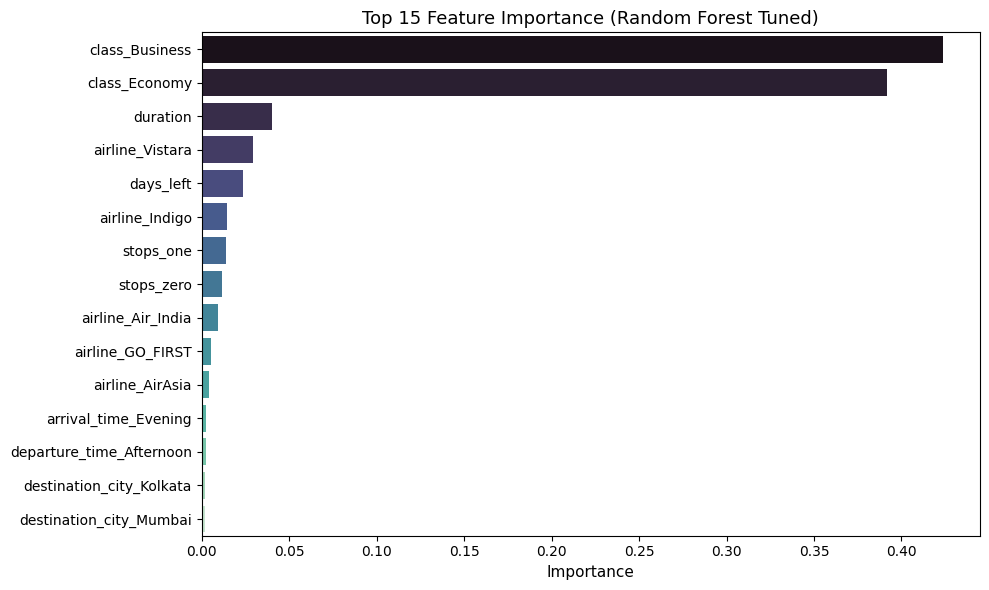

In [42]:
rf = best_model_rf.named_steps['classifier']
importance = rf.feature_importances_

# Ambil nama kolom setelah transformasi
transformer = best_model_rf.named_steps['transformer']
feature_names = transformer.get_feature_names_out()

# Bersihkan nama kolom biar lebih readable
feature_names_clean = [name.replace("categorical__", "")
                       .replace("numerical__", "")
                       for name in feature_names]

# Buat DataFrame importance
fi_df = pd.DataFrame({
    'Feature': feature_names_clean,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10, 6))
sns.barplot(data=fi_df.head(15), x='Importance', y='Feature', palette='mako')
plt.title("Top 15 Feature Importance (Random Forest Tuned)", fontsize=13)
plt.xlabel("Importance", fontsize=11)
plt.ylabel("")
plt.tight_layout()
plt.show()


1. class_Business dan class_Economy (Paling dominan)

Dua fitur ini memiliki pengaruh terbesar terhadap harga tiket, jauh di atas fitur lain.

Business class biasanya jauh lebih mahal karena fasilitas premium (kursi lebih luas, makanan, prioritas boarding, dll).

Economy class menjadi baseline harga yang lebih rendah.


Dari grafik, kontribusi kedua fitur ini hampir 80% total importance — artinya tipe kelas menentukan sebagian besar variasi harga.

2. duration

Durasi penerbangan juga sangat berpengaruh.

Semakin lama penerbangan berarti semakin tinggi biaya bahan bakar, awak kabin, waktu operasional pesawat, dan juga seberapa jauh destinasi.

Sisa dari fitur hanya sebagai faktor pendukung, namun model kita lebih mementingkan Class Business dan Economy secara jauh.

## Kelebihan, Kekurangan Best Model dan Improvement

**Kelebihan**

- Prediksi harga akurat MAE 32000 Rupee (dari CV) artinya rata-rata prediksi meleset 3200 dibanding harga rata-rata 20000, cukup baik untuk optimasi pricing.
- Stabilitas model (CV stabil), lebih sedikit fluktuasi saat dipakai pada subset data yang berbeda.

**Kekurangan**

- Kurang interpretatif, Random Forest sulit dijelaskan secara detail bagaimana keputusan harga dibuat (tidak seperti Linear Regression yang punya koefisien jelas)

- Walaupun kita bisa lihat feature importance, kita tetap tidak tahu arah pengaruhnya (apakah durasi menaikkan atau menurunkan harga, misalnya)

- Walau tuning sudah dilakukan, model dengan banyak pohon tetap bisa sedikit overfit terhadap data training, terutama kalau data tidak terlalu besar atau tidak seimbang antar maskapai/kota.

- Harga tiket itu berubah dari waktu ke waktu (musim liburan, event besar, krisis, dll). Random Forest tidak punya memory atas waktu, jadi tidak bisa belajar pola musiman (seasonality) seperti model time series (ARIMA, SARIMAX, dll.)


**Improvement**

- Buat model terpisah per kelas atau tambahkan interaksi (misal duration × class) agar prediksi lebih intrepretatif.

- Tambahkan derived feature engineering seperti total travel time per stop.

- Tambah fitur time-series seperti days_left_group (0–3, 4–7, 8–14, dst) untuk deteksi fase harga (early bird vs last minute).

# Model Saving

In [43]:
with open("best_model_rf.pkl", "wb") as file_1:
    pickle.dump(best_model_rf, file_1)

# Kesimpulan

1. **EDA & Insight Bisnis**  
    - Harga tiket sangat dipengaruhi oleh jumlah transit, kelas penerbangan, durasi, dan maskapai.
    - Kota tujuan tersibuk adalah Mumbai, Delhi, dan Bangalore.
    - Vistara dan Air India mendominasi jumlah penerbangan.

2. **Feature Engineering & Selection**  
    - Data diolah dan dipilih fitur yang relevan, seperti durasi, days_left, maskapai, waktu keberangkatan, jumlah transit, kota tujuan, dan kelas.
    - Fitur kelas (Business/Economy) dan durasi penerbangan paling berpengaruh terhadap harga.

3. **Modeling & Evaluasi**  
    - Berbagai algoritma diuji: KNN, SVR, Decision Tree, Random Forest, Gradient Boost.
    - Random Forest Regressor dengan tuning hyperparameter menghasilkan model terbaik (goodfit), dengan MAE sekitar 3200 Rupee dan R2 sekitar 0.94 pada cross-validation.

4. **Interpretasi Model**  
    - Model sangat akurat dan stabil, cocok untuk membantu bisnis menentukan harga tiket optimal.
    - Kelas penerbangan dan durasi adalah faktor utama penentu harga.

5. **Improvement**  
    - Model dapat ditingkatkan dengan fitur time-series, interaksi antar fitur, dan segmentasi lebih detail.

Secara keseluruhan, notebook ini berhasil membangun model prediksi harga tiket pesawat yang akurat dan dapat digunakan untuk mendukung pengambilan keputusan bisnis maskapai.

**Rekomendasi Bisnis:**

- Maskapai dapat mempertimbangkan strategi harga berdasarkan kelas dan rute populer, misalnya memberikan promo untuk kelas ekonomi di rute padat agar tetap kompetitif.

- Karena rute ke Mumbai, Delhi, dan Bangalore paling ramai, penyesuaian harga dinamis (dynamic pricing) sangat penting untuk memaksimalkan pendapatan tanpa kehilangan demand.

- Gunakan model ini untuk memprediksi tren harga dan membuat strategi diskon early booking.
Misalnya, jika days_left menunjukkan semakin dekat keberangkatan harga makin tinggi, bisa diberi promo early bird untuk meningkatkan cashflow lebih awal

- Model dapat diintegrasikan ke sistem rekomendasi harga dinamis agar maskapai bisa menyesuaikan tarif tiket secara real-time.